# Apartat (C): Analitzant Dades
El primer de tot que hem de fer és analitzar la base de dades. Per fer-ho ens ajudarem d'una sèrie de llibreries que ens permeten carregar i visualitzar les dades.

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import scipy.stats
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

Un cop importades les llibreries podem llegir el dataset i utilitzant la funció 'dropna()' eliminem els valors nuls i NaN. Després, guardem les dades del DataFrame en una variable a part, per així poder-les manipular de forma més fàcil.

In [82]:
dataset = pd.read_csv('dataset.csv', decimal=',').dropna()
data = dataset.values

Utilitzant les funcions 'head()' i 'tail()' podem veure una mostra de les nostres dades, i agafar una idea del que contenen i veure si estan ordenades d'una manera en concret.

In [83]:
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.300,23.900,32.500,0.000,0.000,25.461
1,2015-01-02,27.020,24.500,33.500,0.000,0.000,28.972
2,2015-01-03,24.820,22.400,29.900,0.000,1.000,30.814
3,2015-01-04,23.980,21.500,28.600,1.200,1.000,29.799
4,2015-01-05,23.820,21.000,28.300,0.000,0.000,28.900


In [84]:
dataset.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24.000,21.100,28.200,13.600,1.000,32.307
361,2015-12-28,22.640,21.100,26.700,0.000,0.000,26.095
362,2015-12-29,21.680,20.300,24.100,10.300,0.000,22.309
363,2015-12-30,21.380,19.300,22.400,6.300,0.000,20.467
364,2015-12-31,24.760,20.200,29.000,0.000,0.000,22.446


Observant aquesta informació podem concloure que les columnes tenen el següent significat:
- **Data**: Data en la qual es va registrar l'entrada.
- **Temperatura Media**: Temperatura mitjana del dia en el qual es va registrar l'entrada (en Celsius).
- **Temperatura Mínima**: Temperatura mínima del dia en el qual es va registrar l'entrada (en Celsius).
- **Temperatura Màxima**: Temperatura màxima del dia en el qual es va registrar l'entrada (en Celsius).
- **Precipitacao**: Mil·límetres de precipitació registrats el dia en el qual es va registrar l'entrada.
- **Final de Semana**: Un 0 indica que no es entre setmana, un 1 que és cap de setmana.
- **Consumo de cerveja**: Litres de cervesa consumits en el dia en el qual es va registrar l'entrada.

Per facilitarnos la vida, traduirem els noms de les columnes a l'anglès i amb '_' en comptes d'espais

In [85]:
dataset.columns = ['date', 'avg_temp', 'min_temp', 'max_temp', 'precipitation', 'weekend', 'consumption_liters']

Hi ha un petit problema amb les dades, i és que el separador decimal es una coma en totes les columnes menys en la del consum de cervesa. Per resoldre aquesta inconsistencia, el que fem és, al llegir el csv em especificat que el separador decimal es la coma, i ara només ens falta convertir la columna del consum de cervesa a float.

In [86]:
dataset['consumption_liters'] = pd.to_numeric(dataset['consumption_liters'])

Una altra cosa que ens pot resultar d'utilitat és calcular les estadístiques dels atributs numèrics del dataset.

In [87]:
dataset.describe()

,avg_temp,min_temp,max_temp,precipitation,weekend,consumption_liters
count,365.000,365.000,365.000,365.000,365.000,365.000
mean,21.226,17.461,26.612,5.197,0.285,25.401
std,3.180,2.826,4.317,12.418,0.452,4.399
min,12.900,10.600,14.500,0.000,0.000,14.343
25%,19.020,15.300,23.800,0.000,0.000,22.008
50%,21.380,17.900,26.900,0.000,0.000,24.867
75%,23.280,19.600,29.400,3.200,1.000,28.631
max,28.860,24.500,36.500,94.800,1.000,37.937


Un cop tenim una idea de com estan estructurades les dades i del que representen podem decidir quin serà l'atribut objectiu. Ens hem decantat pel consum de cervesa en litres, ja que conté una bona variabilitat de les dades i és la de més interès respecte a la correlació de les dades, ja que no tindria massa sentit, per exemple, intentar preveure la temperatura en funció de la cervesa que veu la gent. És més aviat al contrari, volem veure la predisposició que té la gent a beure cervesa en funció de la temperatura.
Un cop escollit l'atribut objectiu, el següent pas és representar les dades gràficament per entendre millor com es relacionen entre elles i comprendre-les numèricament de manera que ens puguin donar una noció de per on encaminar-nos.

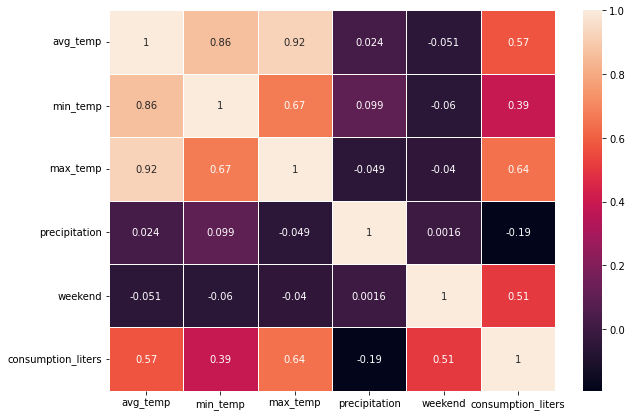

In [88]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(dataset.corr(), annot=True, linewidths=.5)

Podem veure que sembla que hi hagi una correlació entre la temperatura mitjana i la temperatura màxima i la consumició de cervesa.
Una altre correlació que ens pot resultar interessant és la del consum de cervesa i cap de setmana. El problema que tenim és que hi ha molts més dies laborals que de cap de setmana i per tant obtindrem un nombre major de consum de cervesa en dies laborals, tot i que proporcionalment no és cert, com veurem més endevant. En la següent gràfica podem observar la gran diferencia entre la quantitat de dies laborals i de cap de setmana.

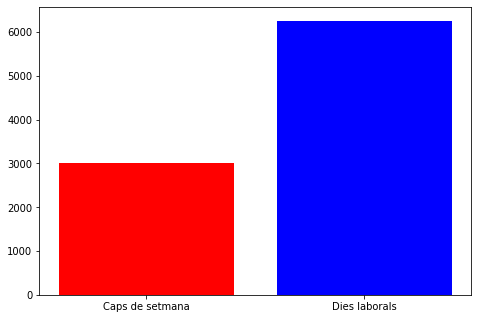

In [89]:
weekends_liters = sum(dataset[dataset.weekend == 1]['consumption_liters'])
weekdays_liters = sum(dataset[dataset.weekend == 0]['consumption_liters'])
fig = plt.figure()
labels = ["Caps de setmana", "Dies laborals"]
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, [weekends_liters, weekdays_liters], color=["r", "b"])
plt.show()

Per solucionar aquest problema, el que podem fer 

In [90]:
dataset['date'] = pd.to_datetime(dataset['date'])

Un cop fet això creem l'atribut del dia de la setmana. Ja que hi estem posats creem un camp mes, que ens pot resultar d'utilitat més endevant.

In [91]:
dataset['month'] = dataset['date'].apply(lambda x: x.strftime('%B'))
dataset['day'] = dataset['date'].apply(lambda x: x.strftime('%A'))
dataset.head()

,date,avg_temp,min_temp,max_temp,precipitation,weekend,consumption_liters,month,day
0,2015-01-01,27.300,23.900,32.500,0.000,0.000,25.461,January,Thursday
1,2015-01-02,27.020,24.500,33.500,0.000,0.000,28.972,January,Friday
2,2015-01-03,24.820,22.400,29.900,0.000,1.000,30.814,January,Saturday
3,2015-01-04,23.980,21.500,28.600,1.200,1.000,29.799,January,Sunday
4,2015-01-05,23.820,21.000,28.300,0.000,0.000,28.900,January,Monday


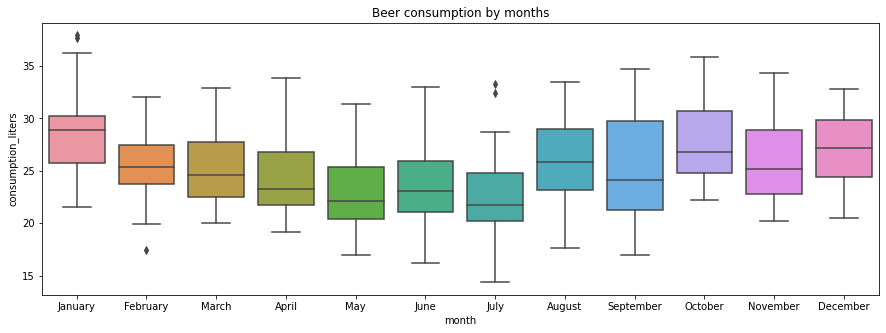

In [92]:
plt.figure(figsize=(15, 5))
plt.title("Beer consumption by months")
ax = sns.boxplot(data=dataset, x = "month", y = "consumption_liters")
plt.show()

Podem veure que com hem vist anteriorment en el heatmap hi ha una correlació entre els mesos on fa més calor es consumeix més llitres de cervesa (en el hemisferi sud que és on es troba Brasil, fa calor quan fa fret al hemisferi nord que és on es troba Europa).

**1. Quin és el tipus de cada atribut?**

Tots els atributs són floats menys el de cap de setmana que és un boolea.

**2. Quins atributs tenen una distribució Gaussiana?**

Observant els histogrames en la diagonal del "pair plot", podem veure que tots els atributs menys els de precipitació i cap de setmana segueixen una distribució Gaussiana.

**3. Quin és l'atribut objectiu? Per què?**

L'atribut objectiu, com hem mencionat al principi serà el consum de cervesa en litres. És l'atribut objectiu, ja que és l'única de les dades que té un valor a preveure amb cert valor, ja que les altres relacions que podem trobar entre les dades no ens interessen (com si plou més quan la gent beu cervesa en canvi de el revés).